In [1]:
from __future__ import print_function, division

# Data Visualisation with the Seaborn library

`Seaborn` is a library written in the Python language which allows production of beautiful statistical plots with minimal coding required. 

It is part of the pandas, numpy and matplotlib ecosystem of data tools and best used together with IPython or even Jupyter notebooks, as is demonstrated here. Seaborn is best used as an exploratory tool; to get a quick feel of data. We find that Seaborn is best used as a tool to make compare distributions between categorical classes of data. 

In this talk, we will go through some of the capabilities of this library and some examples of its use in real life projects. 

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import re
%matplotlib inline
mpl.style.use("ggplot")

## Straightforward API

Seaborn's visualizations are created by making a single function call with the appropriate customizations passed as arguments to the function. 

In [208]:
dataPath = os.path.join(os.getcwd(), "FiveCitiesPMData")
dataFiles = os.listdir(dataPath)

df_dict = {}
for f in dataFiles:
    df = pd.read_csv(os.path.join("FiveCitiesPMData", f), index_col=0)
    pm_cols = df.filter(regex="PM").columns
    id_cols = df.columns.difference(pm_cols)
    #print(pm_cols)
    df = df.melt(id_vars= id_cols, value_vars=pm_cols, var_name="Station", value_name="PM2.5Concentration")
    reg = re.search("\w+(?=PM)", f)
    city_name = reg.group(0)
    #print("Load {}".format(city_name))
    df_dict[city_name] = df

PM_dataset = pd.concat(df_dict, names=["City"])
PM_dataset.sample(5)

DEWP   HUMI  Iprec    Iws    PRES  TEMP cbwd  day  hour  \
City                                                                        
Guangzhou 135395  20.3  74.00    0.0  11.00   998.9  25.3   NE   13    11   
Beijing   143739   9.0  55.00    0.0   1.78   994.0  18.0   cv   27     3   
Shenyang  51951  -16.0  28.75    0.0  39.00  1029.0   0.0   NW    5    15   
          8313   -25.0  45.68    NaN  84.00  1032.0 -16.0   NE   13     9   
Beijing   100733  17.0  88.00    0.0  26.83  1006.0  19.0   NW   30     5   

                  month  precipitation  season  year          Station  \
City                                                                    
Guangzhou 135395      6            0.0     2.0  2013       PM_US Post   
Beijing   143739      5            0.0     1.0  2014  PM_Nongzhanguan   
Shenyang  51951      12            0.0     4.0  2015    PM_Taiyuanjie   
          8313       12            NaN     4.0  2010    PM_Taiyuanjie   
Beijing   100733      6            0.0     2.0  2015    PM_Dongsihuan   

                  PM2.5Concentration  
City                                  
Guangzhou 135395                36.0  
Beijing   143739                28.0  
Shenyang  51951                 17.0  
          8313                   NaN  
Beijing   100733                 5.0

Source : https://archive.ics.uci.edu/ml/datasets/PM2.5+Data+of+Five+Chinese+Cities

In [209]:
plot_df = PM_dataset.dropna()

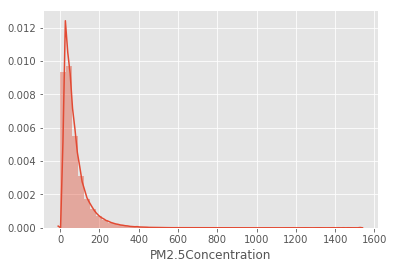

In [161]:
sns.distplot(plot_df["PM2.5Concentration"]);

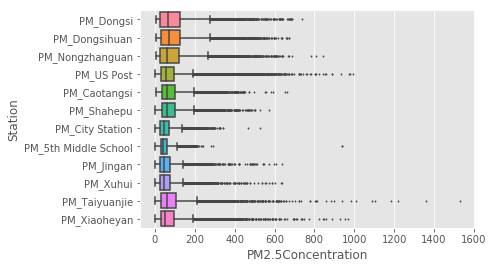

In [206]:
sns.boxplot(y="Station", x="PM2.5Concentration", data=plot_df, fliersize=1, saturation=1);

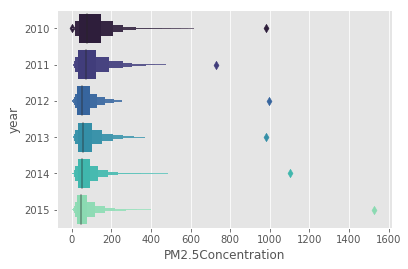

In [210]:
sns.lvplot(y="year", x="PM2.5Concentration", data=plot_df, orient="h", saturation=1,
          palette="mako", outlier_prop=1e-8);

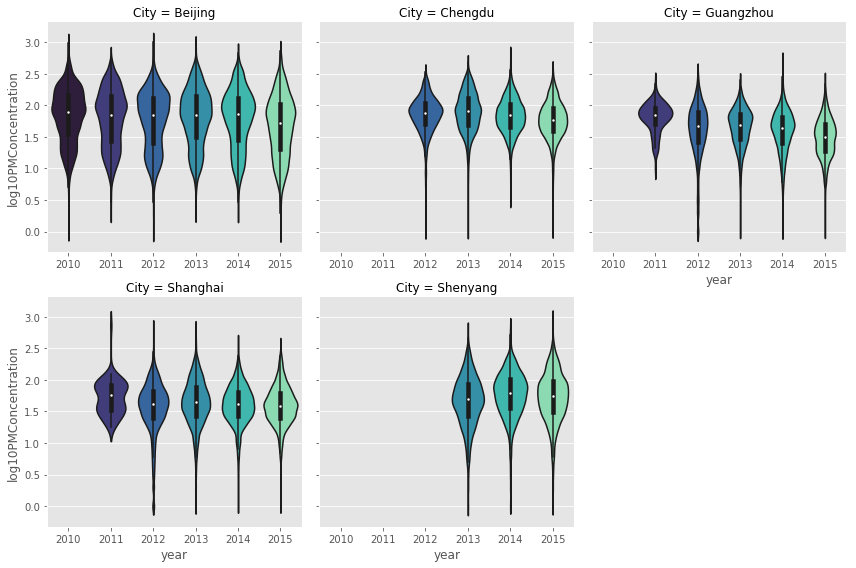

In [211]:
plot_uspost_readings = (plot_df[plot_df.Station == "PM_US Post"]
                         .reset_index("City")
                         .assign(log10PMConcentration=lambda df: np.log10(df["PM2.5Concentration"])))

sns.factorplot("year", "log10PMConcentration", data=plot_uspost_readings,
               col="City", col_wrap=3, kind="violin", palette="mako", sharex=False,
              saturation=1);

In [289]:
concrete = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls")
concrete.columns = [re.search("[\w\s]+(?=\()", col_name).group(0).strip() for col_name in concrete.columns]
print(concrete.columns)
concrete.head()

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Source : https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

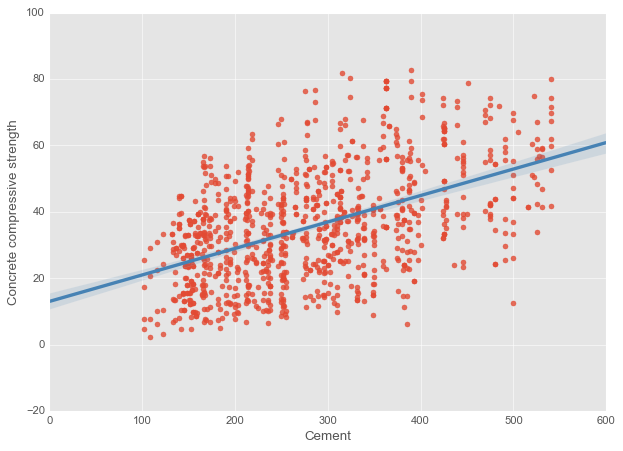

In [303]:
sns.regplot("Cement", "Concrete compressive strength", data=concrete, robust=True, line_kws={"color": "steelblue"})

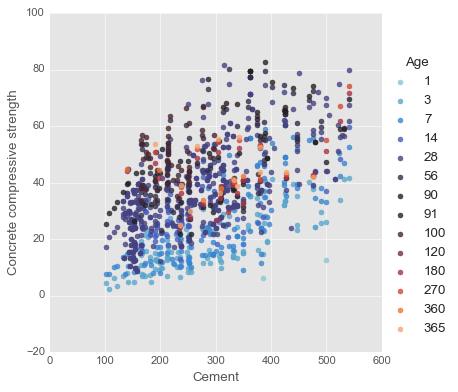

In [291]:
sns.lmplot("Cement", "Concrete compressive strength", concrete, hue="Age", palette="icefire", fit_reg=False)

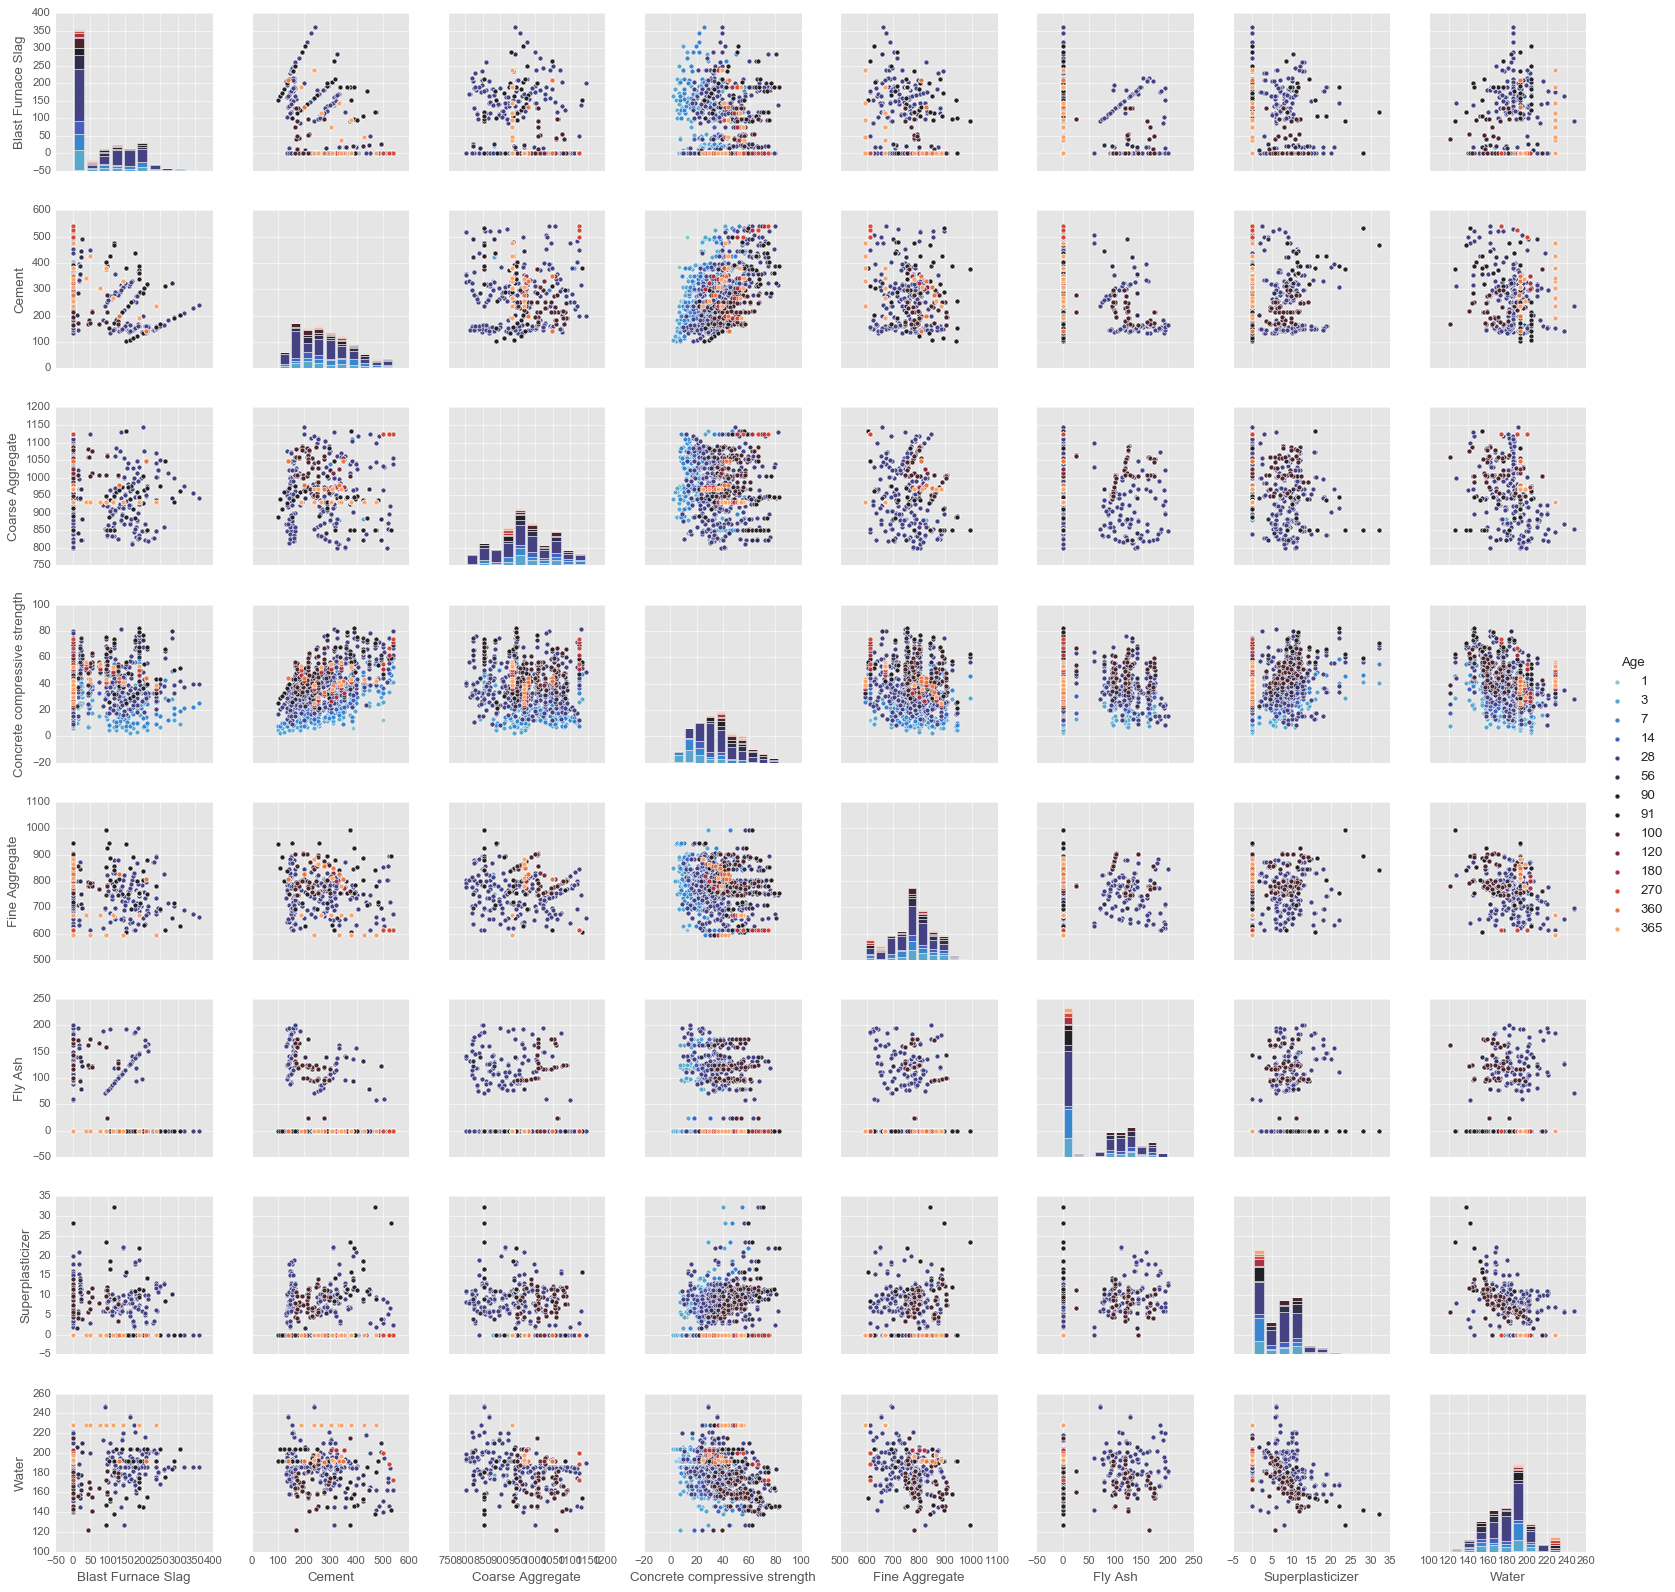

In [297]:
cols = concrete.columns.difference(["Age"])
sns.pairplot(concrete, hue="Age", x_vars=cols, y_vars=cols, palette="icefire")

## Interaction with `matplotlib`

Seaborn is a high level interface to matplotlib. Hence, we can use matplotlib to further customize Seaborn visualizations. 

In [3]:
online_retail = pd.read_excel(os.path.join(os.getcwd(), "Online_Retail.xlsx"))
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom



Source: https://archive.ics.uci.edu/ml/datasets/Online+Retail

In [129]:
online_retail.dropna()
online_retail["TotalSales"] = online_retail["Quantity"]*online_retail["UnitPrice"]

def make_yearmonth_col(x):
    if x.month >=10:
        return "%d-%d" % (x.year, x.month)
    else:
        return "%d-0%d" % (x.year, x.month)

online_retail["YearMonth"] = online_retail["InvoiceDate"].apply(make_yearmonth_col)

plot_df = (online_retail
            .query("TotalSales > 0")
            .groupby(["Country", "YearMonth", "InvoiceNo"], as_index=False)
            .agg({"TotalSales": np.sum})
            .assign(logTotalSales=lambda df: np.log10(df.TotalSales)))

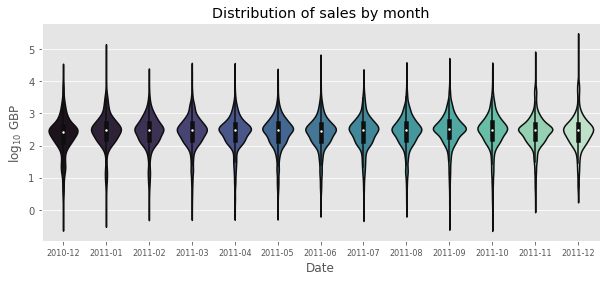

In [135]:
fig1, ax = plt.subplots(1,1, figsize=(10,4))
ax.set_title("Distribution of sales by month")
sns.violinplot("YearMonth", "logTotalSales",data=plot_df, ax=ax, palette="mako")
plt.setp(ax.get_xticklabels(), fontsize=8)
ax.set_xlabel("Date")
ax.set_ylabel("$\log_{10}$ GBP");

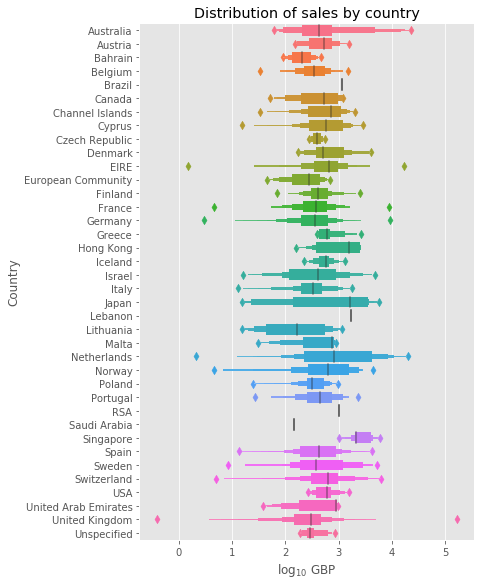

In [136]:
fig2 = plt.figure(figsize=(6, 9.5))
ax = fig2.add_subplot(111)
ax.set_title("Distribution of sales by country")
sns.lvplot(y="Country", x="logTotalSales", data=plot_df, saturation=1, palette="husl", outlier_prop=1e-8 )
ax.set_xlabel("$\log_{10}$ GBP")
ax.set_ylabel("Country");